In [174]:
import pandas as pd

from IPython.display import Image, display
#from PIL import Image
from PIL.ImageDraw import Draw

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import glob
import os

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


Train Dataset contains 39209 non-null Images

In [4]:
df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

> Train csv file has 8 columns

> Width and Hight columns contains Width and Height of photos

> Roi.X1 corresponds to Upper left X coordinate of sign on image
> Roi.Y1 corresponds to Upper left Y coordinate of sign on image
> Roi.X2 corresponds to Lower right X coordinate of sign on image
> Roi.Y2 corresponfs to Lower right Y coordinate of sign on image

> ClassId contains the information of Class of provided Image

> Path columns has the Image file location stored.

In [14]:
df.rename(columns={'Roi.X1': 'RoiX1', 'Roi.X2': 'RoiX2', 'Roi.Y1': 'RoiY1', 'Roi.Y2': 'RoiY2'}, inplace=True)

In [15]:
df.head()

Width  Height  RoiX1  RoiY1  RoiX2  RoiY2  ClassId  \
0     27      26      5      5     22     20       20   
1     28      27      5      6     23     22       20   
2     29      26      6      5     24     21       20   
3     28      27      5      6     23     22       20   
4     28      26      5      5     23     21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

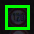

category: 8


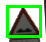

category: 22


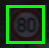

category: 5


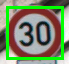

category: 1


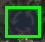

category: 40


In [16]:
# visualising some Images
for index, row in df.sample(frac=1)[:5].iterrows():
    image = Image.open(row.Path)
    draw = Draw(image)
    draw.rectangle([row.RoiX1, row.RoiY1, row.RoiX2, row.RoiY2], outline='#00FF00', width=3)
    display.display(image)
    print('category:', row.ClassId)

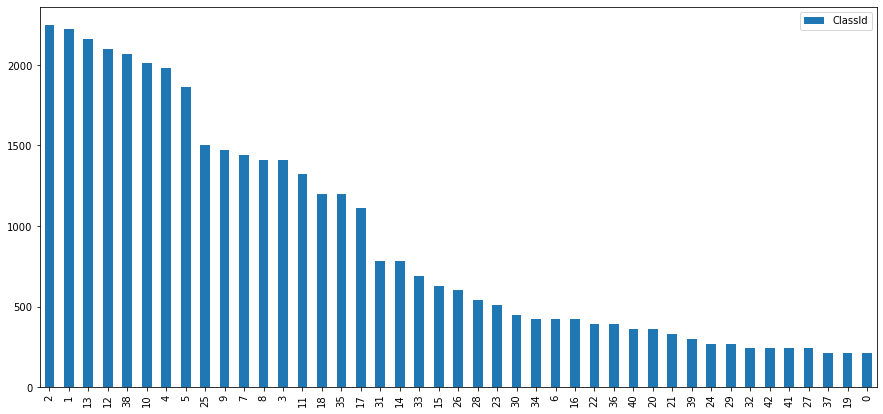

In [59]:
pd.DataFrame(df['ClassId'].value_counts()).plot(kind='bar', figsize=(15,7))

In [56]:
df['ClassId'].value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
18    1200
35    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
22     390
36     390
40     360
20     360
21     330
39     300
24     270
29     270
32     240
42     240
41     240
27     240
37     210
19     210
0      210
Name: ClassId, dtype: int64

In [211]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files, title=['No Title'], fig_size=(15,40), rows=5):
    fig = figure(figsize=fig_size)
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a = fig.add_subplot((number_of_files//rows)+1,rows,i+1)
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        a.set_title(title[i])
        axis('off')

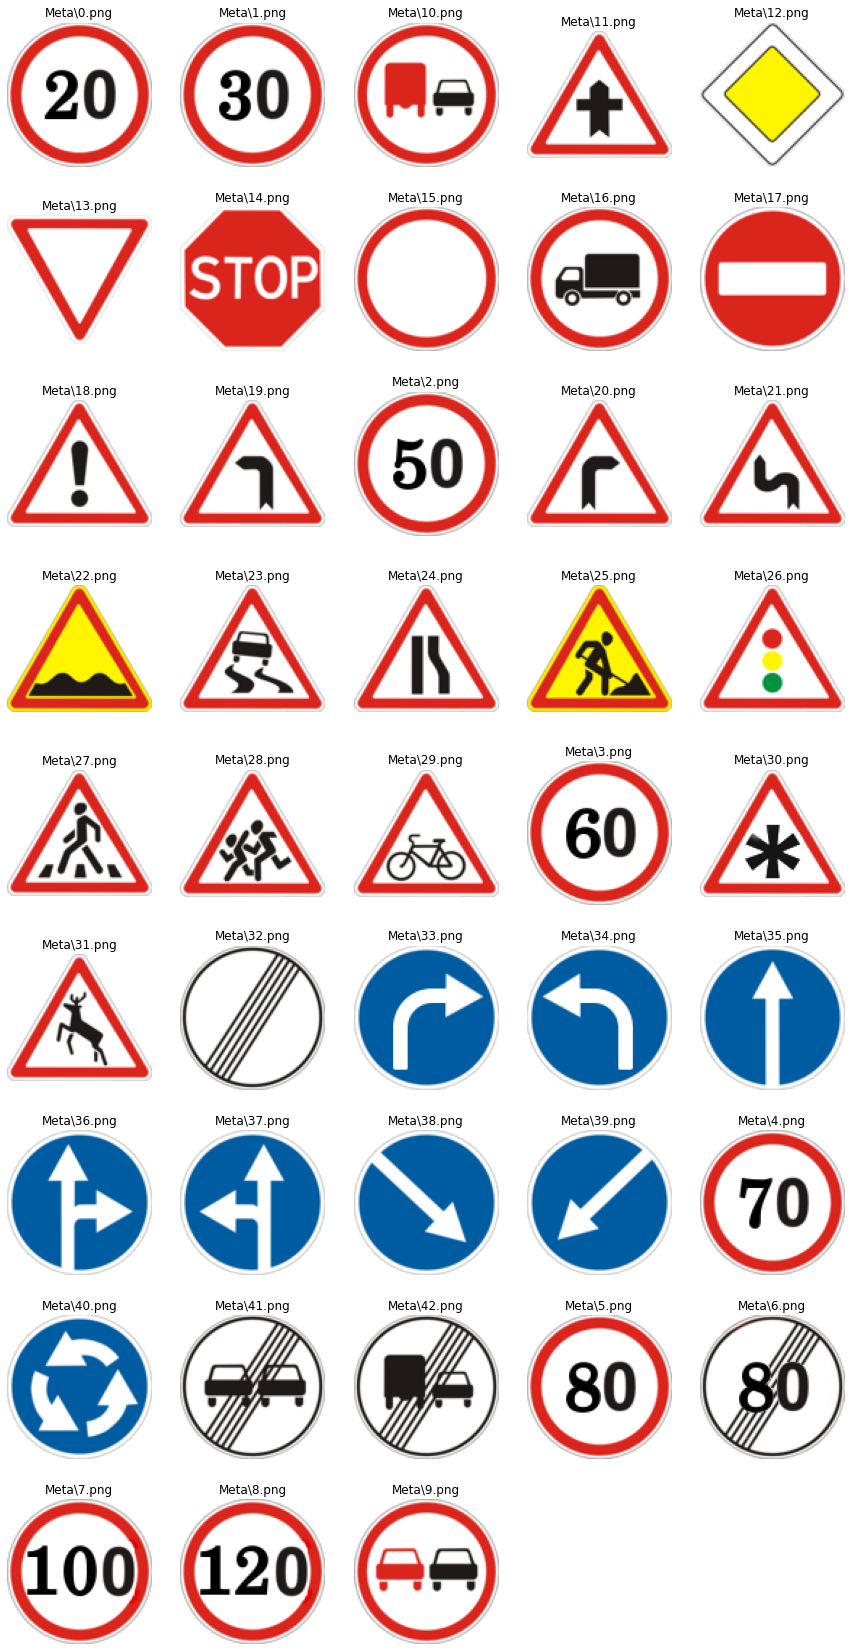

In [167]:
showImagesHorizontally(glob.glob('Meta/*.png'), title=glob.glob('Meta/*.png') fig_size=(15,30))

In [182]:
df[df['ClassId']==5].sample(5)

Width  Height  RoiX1  RoiY1  RoiX2  RoiY2  ClassId  \
8573     52      54      6      6     47     49        5   
9536     58      58      5      6     53     53        5   
8816     86      86      8      8     79     79        5   
9220     32      30      6      5     27     24        5   
8720     55      56      5      6     50     51        5   

                               Path  
8573  Train/5/00005_00004_00023.png  
9536  Train/5/00005_00036_00026.png  
8816  Train/5/00005_00012_00026.png  
9220  Train/5/00005_00026_00010.png  
8720  Train/5/00005_00009_00020.png

In [183]:
range(42)

range(0, 42)

In [184]:
a = range(42)

In [185]:
print(a)

range(0, 42)


### Randomly showing 5 images from each Class

In [196]:
PathList = []
ClassList = []
for x in range(43):
    sample = df[df['ClassId']==x].sample(5)
    PathList = PathList + sample.Path.to_list()
    ClassList = ClassList + sample.ClassId.to_list()

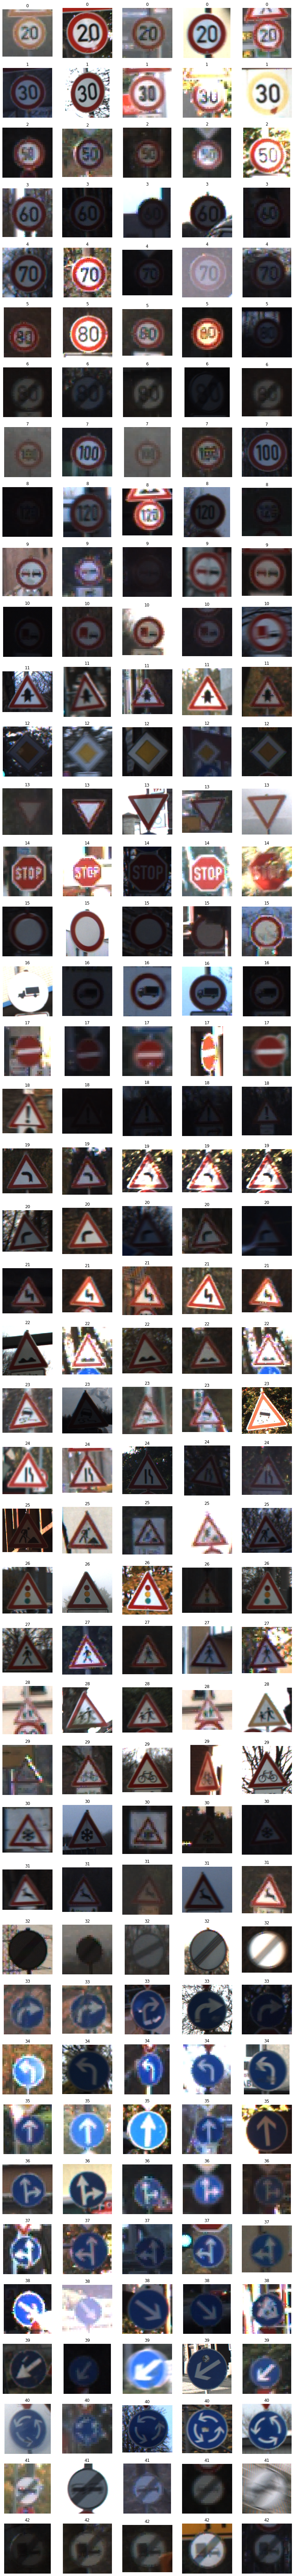

In [215]:
showImagesHorizontally(PathList, title=ClassList, fig_size=(15,140))